# Baseline CNN and creation of BSD

### This file has the results of the baseline CNN and the creation of BSD dataset. The steps performed are:

1. This dataset consists of 2302 training and 998 test samples. 
2. The experimental dataset is randomly split into train and test sets with a split ratio of 70:30.
3. The baseline CNN model has four convolutional layers with 15 filters each of size 3*3. 
4. Adam's technique is used as the optimizer. Binary cross-entropy is used as the loss function. 
5. This CNN is trained for 150 epochs. 
6. Softmax is used as the final activation function which outputs predicted probabilities. 
7. The BSD is created which contains all the samples whose confidence factor is less than a certain threshold

In [3]:
import scipy.misc
import random
import imageio
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.applications.inception_v3 import InceptionV3

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.utils.vis_utils import plot_model
from keras import backend as K
import keras.optimizers as optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, BatchNormalization
from keras.optimizers import SGD,RMSprop,Adam

The malignant and benign data is loaded to np arrays. 

In [4]:
xs = []
ys = []
def Load_data_malignant():
    path ="Dataset_Final/malignant"
    x_out = []
    y_out = []
    for i in range(1, 1500):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 1 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out


In [5]:
def Load_data_benign():
    path ="Dataset_Final/benign"
    x_out = []
    y_out = []
    for i in range(1, 1800):
        img = imageio.imread(path +'/' + str(i) + '.jpg')
        lab = 0 
        x_out.append(img)
        y_out.append(lab)
    return x_out, y_out

The benign and malignant arrays are assigned to x and y arrays

In [6]:
x_0, y_0 = Load_data_benign()

In [11]:
x_1, y_1 = Load_data_malignant()

In [13]:
x_0 = np.array(x_0)
y_0 = np.array(y_0)

x_1 = np.array(x_1)
y_1 = np.array(y_1)


The arrays are concatenated to form x and y arrays (features, outputs)

In [14]:
num_classes = 2
x=np.concatenate((x_0, x_1), axis=0)
y=np.concatenate((y_0, y_1), axis=0)

y = np_utils.to_categorical(y, num_classes)

The data is split as train and test with 70:30 split

In [15]:
x_train, x_Test, y_train, y_Test = train_test_split(x, y, test_size=0.3, random_state=5,stratify=y)

The CNN model is defined below

In [16]:
nClasses = 2

def createModel():
    model = Sequential()
    
    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu', input_shape=(224,224,3)))
    model.add(BatchNormalization())
      
    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
    model.add(Conv2D(15, (3, 3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(15, (3, 3), padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(nClasses, activation='softmax'))
    model.summary()
     
    return model

Optimizer is chosen as Adam, binary cross entropy is the loss function, with epochs as 150

In [17]:
model1 = None
model1 = createModel()
batch_size = 40
epochs = 150
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0)
model1.compile(loss='binary_crossentropy', optimizer=opt,metrics = ['categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 15)      420       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 15)     60        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 15)      2040      
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 15)     60        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 15)     0         
 )                                                               
                                                        

C:\Users\Kannan-PC\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


The model is fit to the data

In [20]:
history=model1.fit(x_train, y_train, epochs=150,batch_size = batch_size,validation_data= (x_Test, y_Test), shuffle=True)

Epoch 1/150
58/58 [==============================] - 142s 2s/step - loss: 0.6681 - categorical_accuracy: 0.7533 - val_loss: 0.8232 - val_categorical_accuracy: 0.5501
Epoch 2/150
58/58 [==============================] - 151s 3s/step - loss: 0.4124 - categorical_accuracy: 0.7992 - val_loss: 1.4596 - val_categorical_accuracy: 0.5905
Epoch 3/150
58/58 [==============================] - 139s 2s/step - loss: 0.3905 - categorical_accuracy: 0.8088 - val_loss: 1.1373 - val_categorical_accuracy: 0.6562
Epoch 4/150
58/58 [==============================] - 128s 2s/step - loss: 0.3530 - categorical_accuracy: 0.8105 - val_loss: 0.6749 - val_categorical_accuracy: 0.7634
Epoch 5/150
58/58 [==============================] - 128s 2s/step - loss: 0.3530 - categorical_accuracy: 0.8222 - val_loss: 0.8719 - val_categorical_accuracy: 0.7492
Epoch 6/150
58/58 [==============================] - 127s 2s/step - loss: 0.3322 - categorical_accuracy: 0.8248 - val_loss: 0.7086 - val_categorical_accuracy: 0.7897
Epoc

58/58 [==============================] - 127s 2s/step - loss: 0.0398 - categorical_accuracy: 0.9857 - val_loss: 1.3159 - val_categorical_accuracy: 0.7786
Epoch 51/150
58/58 [==============================] - 127s 2s/step - loss: 0.0582 - categorical_accuracy: 0.9831 - val_loss: 1.1189 - val_categorical_accuracy: 0.7776
Epoch 52/150
58/58 [==============================] - 127s 2s/step - loss: 0.0577 - categorical_accuracy: 0.9818 - val_loss: 3.3963 - val_categorical_accuracy: 0.6866
Epoch 53/150
58/58 [==============================] - 127s 2s/step - loss: 0.0446 - categorical_accuracy: 0.9861 - val_loss: 0.9831 - val_categorical_accuracy: 0.8311
Epoch 54/150
58/58 [==============================] - 127s 2s/step - loss: 0.0238 - categorical_accuracy: 0.9883 - val_loss: 1.4979 - val_categorical_accuracy: 0.7958
Epoch 55/150
58/58 [==============================] - 128s 2s/step - loss: 0.0204 - categorical_accuracy: 0.9887 - val_loss: 0.9677 - val_categorical_accuracy: 0.8402
Epoch 56/15

58/58 [==============================] - 128s 2s/step - loss: 0.0217 - categorical_accuracy: 0.9922 - val_loss: 1.3614 - val_categorical_accuracy: 0.8109
Epoch 100/150
58/58 [==============================] - 128s 2s/step - loss: 0.0275 - categorical_accuracy: 0.9918 - val_loss: 1.4200 - val_categorical_accuracy: 0.7735
Epoch 101/150
58/58 [==============================] - 127s 2s/step - loss: 0.0188 - categorical_accuracy: 0.9939 - val_loss: 1.1317 - val_categorical_accuracy: 0.8059
Epoch 102/150
58/58 [==============================] - 128s 2s/step - loss: 0.0077 - categorical_accuracy: 0.9974 - val_loss: 1.3692 - val_categorical_accuracy: 0.8018
Epoch 103/150
58/58 [==============================] - 128s 2s/step - loss: 0.0168 - categorical_accuracy: 0.9948 - val_loss: 1.5036 - val_categorical_accuracy: 0.7391
Epoch 104/150
58/58 [==============================] - 16567s 291s/step - loss: 0.0175 - categorical_accuracy: 0.9948 - val_loss: 1.1627 - val_categorical_accuracy: 0.8160
Ep

Epoch 148/150
58/58 [==============================] - 127s 2s/step - loss: 0.0042 - categorical_accuracy: 0.9987 - val_loss: 1.3117 - val_categorical_accuracy: 0.8311
Epoch 149/150
58/58 [==============================] - 139s 2s/step - loss: 0.0074 - categorical_accuracy: 0.9978 - val_loss: 1.9530 - val_categorical_accuracy: 0.8119
Epoch 150/150
58/58 [==============================] - 130s 2s/step - loss: 0.0109 - categorical_accuracy: 0.9961 - val_loss: 1.3061 - val_categorical_accuracy: 0.7391


The accuracy and loss graphs are obtained

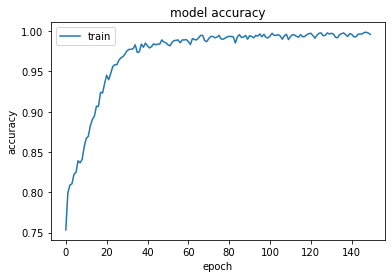

In [25]:
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

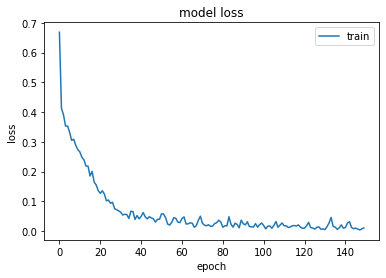

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

The classification report of the test data is printed

In [28]:
from sklearn.metrics import classification_report
pred = model.predict(x_Test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_Test, axis=1), predicted)
print(report)

31/31 [==============================] - 8s 253ms/step
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       540
           1       0.69      0.78      0.73       449

    accuracy                           0.74       989
   macro avg       0.74      0.74      0.74       989
weighted avg       0.75      0.74      0.74       989



After observing the CPVS of the test samples and the respective outputs, the threshold is calculated as 99.99995 and the BSD is created

In [36]:
from PIL import Image
import numpy as np
import os 
for i in range(989):
    if abs((pred[i][0]*100) - (pred[i][1]*100)) < 99.99995 :
        img = Image.fromarray(x_Test[i], 'RGB')
        if np.argmax(y_Test[i])== 0:
                img.save(os.path.join('final/benign/',str(i)+'.jpg'))
        if np.argmax(y_Test[i])== 1:
                img.save(os.path.join('final/malignant/', str(i)+'.jpg'))